<a href="https://colab.research.google.com/github/KaraNuss/coding-intro/blob/main/Data_Vis_CA_Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages("ggfortify")
# will need this for the ANOVA plots

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
library(ggfortify)

In [ ]:
cal <- read.csv("CA_depression.csv")
# importing our data
# Note - have to upload the file every time, easier to post on Github and link?

In [ ]:
cal

Year,Strata,Strata.Name,Percent.Adults.with.Depression.in.CA..LGHC.indicator.
<int>,<chr>,<chr>,<dbl>
2012,Total,Total,11.74
2012,Sex,Male,8.12
2012,Sex,Female,15.25
2012,Race-Ethnicity,White,14.57
2012,Race-Ethnicity,Black,13.54
2012,Race-Ethnicity,Hispanic,9.98
2012,Race-Ethnicity,Asian/Pacific Islander,5.48
2012,Race-Ethnicity,Other,17.34
2012,Education,No High School Diploma,14.43


In [ ]:
glimpse(cal)
# checking our data

Rows: 161
Columns: 4
$ Year                                                  <int> 2012, 2012, 2012…
$ Strata                                                <chr> "Total", "Sex", …
$ Strata.Name                                           <chr> "Total", "Male",…
$ Percent.Adults.with.Depression.in.CA..LGHC.indicator. <dbl> 11.74, 8.12, 15.…


In [ ]:
tbl_df(cal)
# don't need to teach students this command?

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.”


Year,Strata,Strata.Name,Percent.Adults.with.Depression.in.CA..LGHC.indicator.
<int>,<chr>,<chr>,<dbl>
2012,Total,Total,11.74
2012,Sex,Male,8.12
2012,Sex,Female,15.25
2012,Race-Ethnicity,White,14.57
2012,Race-Ethnicity,Black,13.54
2012,Race-Ethnicity,Hispanic,9.98
2012,Race-Ethnicity,Asian/Pacific Islander,5.48
2012,Race-Ethnicity,Other,17.34
2012,Education,No High School Diploma,14.43


In [ ]:
cal <- rename(cal, score = Percent.Adults.with.Depression.in.CA..LGHC.indicator.)

In [ ]:
glimpse(cal)

Rows: 161
Columns: 4
$ Year        <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012…
$ Strata      <chr> "Total", "Sex", "Sex", "Race-Ethnicity", "Race-Ethnicity",…
$ Strata.Name <chr> "Total", "Male", "Female", "White", "Black", "Hispanic", "…
$ score       <dbl> 11.74, 8.12, 15.25, 14.57, 13.54, 9.98, 5.48, 17.34, 14.43…


R makes it easy to explore large datasets and look for potential patterns. Notice in the cell below, there are just a few lines of code. Run the cell to see how easily this gives us multiple graphs to see each of the different categories we might want to investigate.

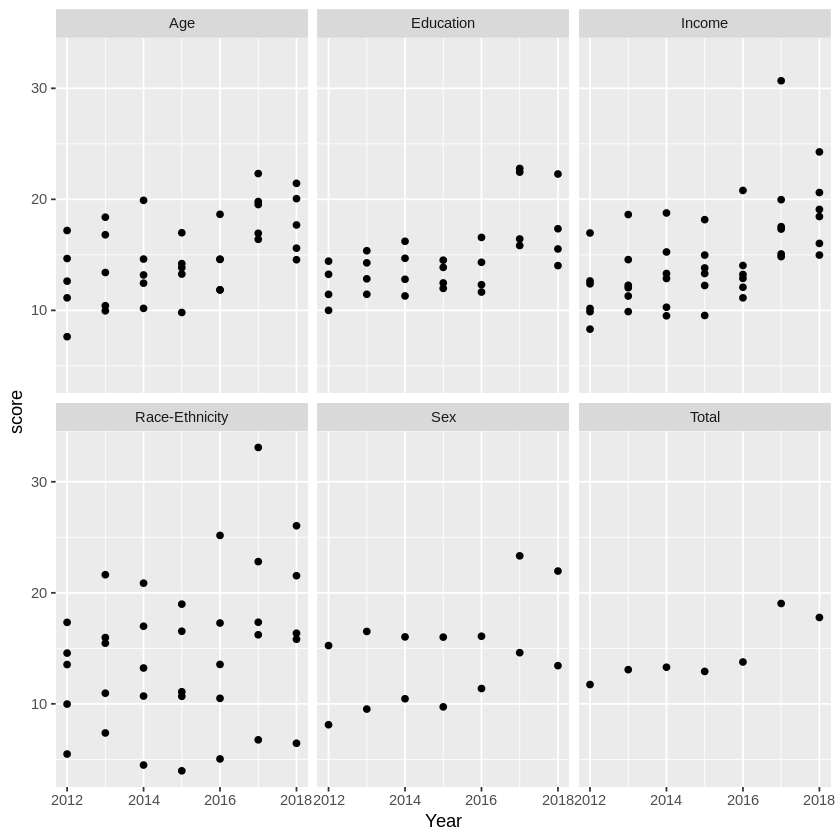

In [ ]:
ggplot(cal, aes(Year, score)) +
  geom_point() +
  facet_wrap(~Strata)

In which category does it seem like the scores are the most spread out?

## replace this text with your answer

In [ ]:
summary(cal)

      Year         Strata          Strata.Name            score      
 Min.   :2012   Length:161         Length:161         Min.   : 3.97  
 1st Qu.:2013   Class :character   Class :character   1st Qu.:11.85  
 Median :2015   Mode  :character   Mode  :character   Median :14.52  
 Mean   :2015                                         Mean   :14.79  
 3rd Qu.:2017                                         3rd Qu.:17.19  
 Max.   :2018                                         Max.   :33.09  

In [ ]:
count(cal, score)
# not what I want here - trying to get number of rows
# BUT this may be helpful for come of the other datasets

# it is interesting that I can see 151 rows for the data frame but the other columns have a length of 161

score,n
<dbl>,<int>
3.97,1
4.49,1
5.04,1
5.48,1
6.45,1
6.76,1
7.38,1
7.63,1
8.12,1


In [ ]:
cal %>%
  group_by(Strata) %>%
  summarise(avg = mean(score), n())

Strata,avg,n()
<chr>,<dbl>,<int>
Age,15.04571,35
Education,14.73071,28
Income,14.86071,42
Race-Ethnicity,14.68086,35
Sex,14.46143,14
Total,14.51857,7


In [ ]:
cal %>%
  group_by(Strata.Name) %>%
  summarise(avg = mean(score), n())
# This is not organized nicely but useful to see ave score for all different categories, and n is working as I wanted

Strata.Name,avg,n()
<chr>,<dbl>,<int>
"$100,000+",11.457143,7
"$20,000 - $34,999",14.972857,7
"$35,000 - $49,999",14.345714,7
"$50,000 - $74,999",14.495714,7
"$75,000 - $99,999",12.708571,7
18 to 34,12.415714,7
35 to 44,13.450000,7
45 to 54,15.774286,7
55 to 64,19.270000,7


In [ ]:
race <- filter(cal, Strata == "Race-Ethnicity")
# limiting to only rows that consider race

In [ ]:
glimpse(race)

Rows: 35
Columns: 4
$ Year        <int> 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013…
$ Strata      <chr> "Race-Ethnicity", "Race-Ethnicity", "Race-Ethnicity", "Rac…
$ Strata.Name <chr> "White", "Black", "Hispanic", "Asian/Pacific Islander", "O…
$ score       <dbl> 14.57, 13.54, 9.98, 5.48, 17.34, 15.97, 15.46, 10.96, 7.38…


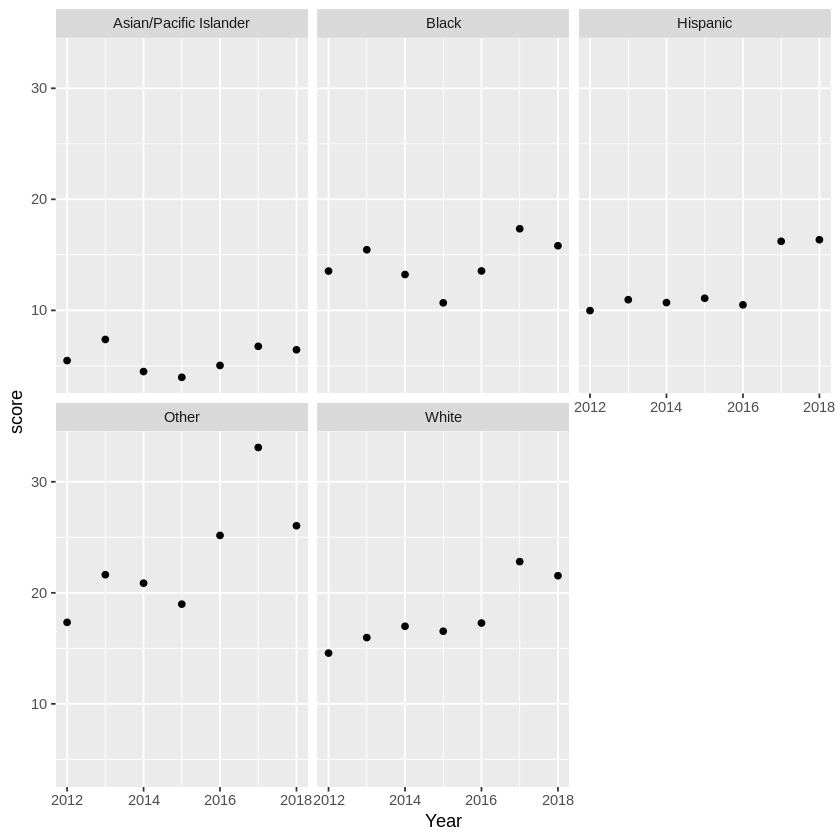

In [ ]:
ggplot(race, aes(Year, score)) +
  geom_point() +
  facet_wrap(~Strata.Name)
# Cool - with a tweak of my earlier code, I can now see how each categories scores change over time.

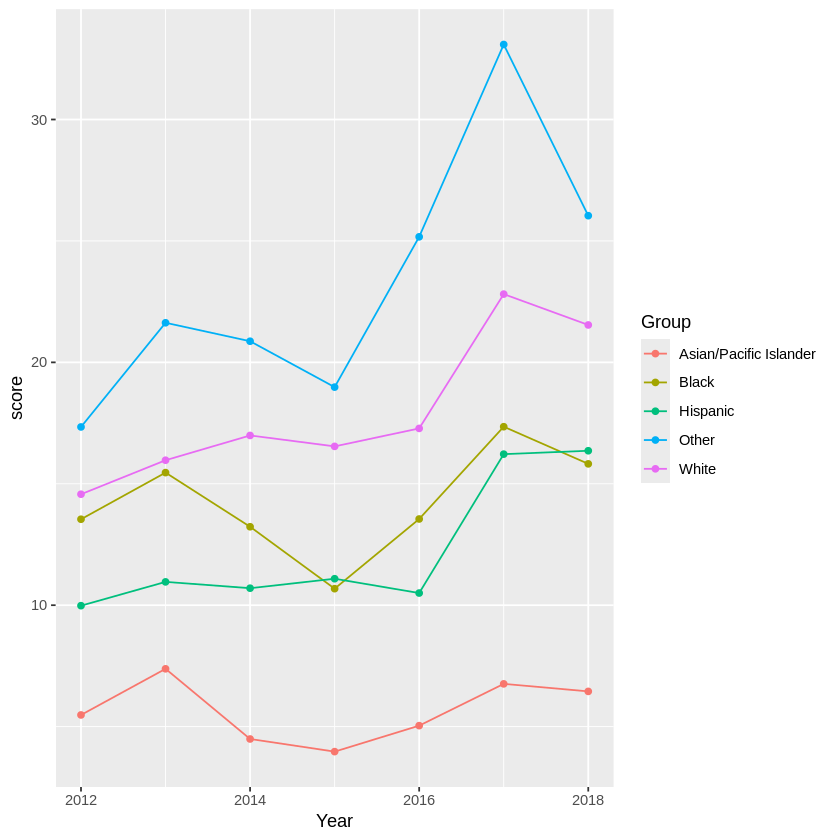

In [ ]:
ggplot(race, aes(Year, score, group = Group, colour = Group)) +
  geom_line() +
  geom_point()
# and this code puts them all in one

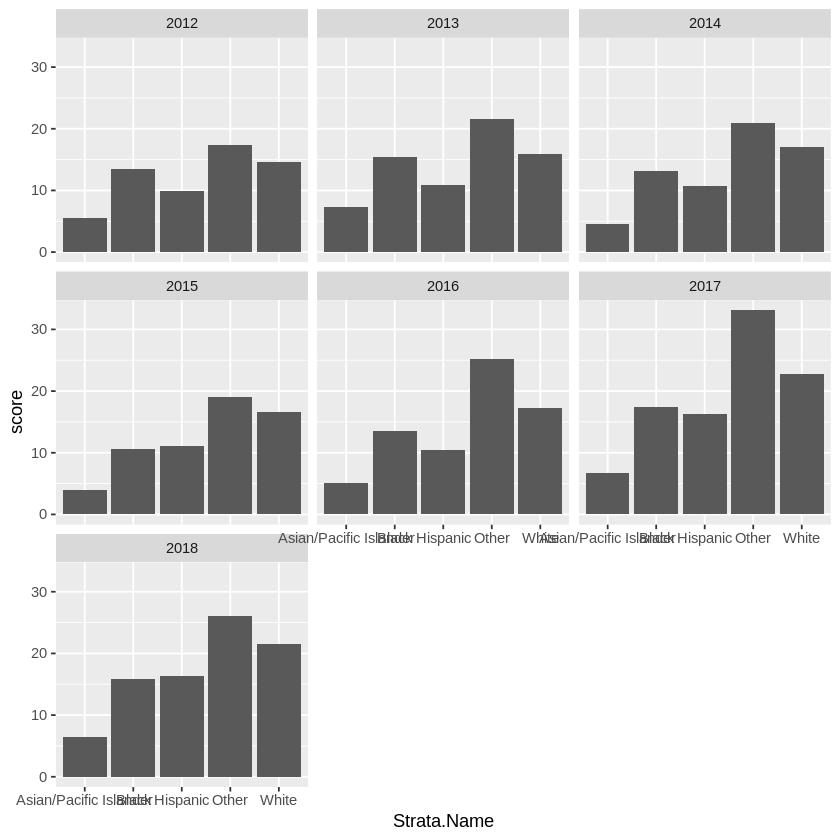

In [ ]:
ggplot(race, aes(Strata.Name, score)) +
  geom_bar(stat = "identity") +
  facet_wrap(~Year)
# okay, this is a start. Need to clear up the axis but good general idea.

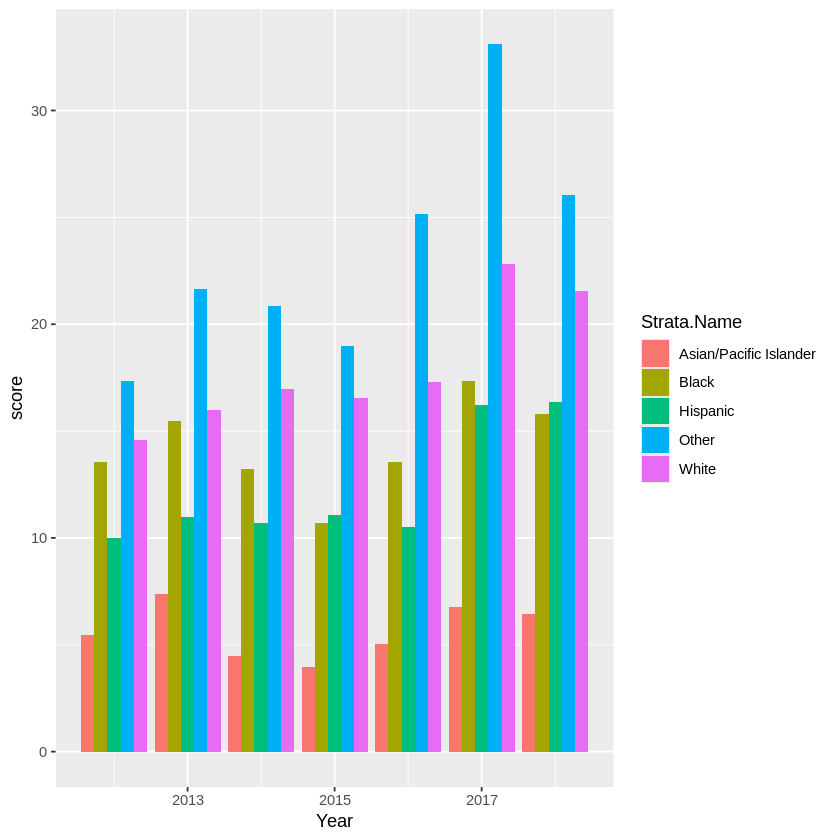

In [ ]:
ggplot(race, aes(Year, score,
    fill = Strata.Name)) +
  geom_bar(stat = "identity", position = 'dodge')
# The colors are horrible, but this is pretty great
# Would need to consider who is in the "other" group

In [ ]:
race <-rename(race, Group = Strata.Name)

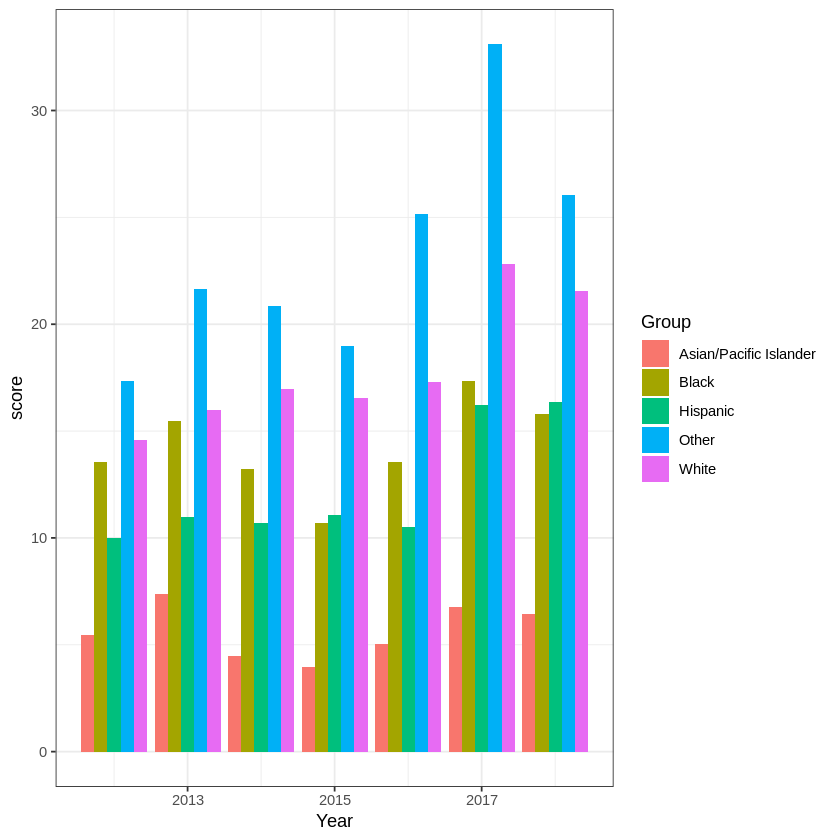

In [ ]:
ggplot(race, aes(Year, score,
    fill = Group)) +
  geom_bar(stat = "identity", position = 'dodge') +
  theme_bw()

In [ ]:
glimpse(race)

Rows: 35
Columns: 4
$ Year   <int> 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 201…
$ Strata <chr> "Race-Ethnicity", "Race-Ethnicity", "Race-Ethnicity", "Race-Eth…
$ Group  <chr> "White", "Black", "Hispanic", "Asian/Pacific Islander", "Other"…
$ score  <dbl> 14.57, 13.54, 9.98, 5.48, 17.34, 15.97, 15.46, 10.96, 7.38, 21.…


In [ ]:
race_plot <- ggplot(race, aes(x = Group, y = score)) +
  geom_boxplot() +
  geom_point(size = 4, colour = 'lightgrey', alpha = 0.5) +
  ylab("Depression Score") +
  theme_bw()

In [ ]:
final <- race_plot + theme(axis.text = element_text(size = 12, angle=0)) +
  theme(axis.title = element_text(size = 15,
                                  face = "bold"))


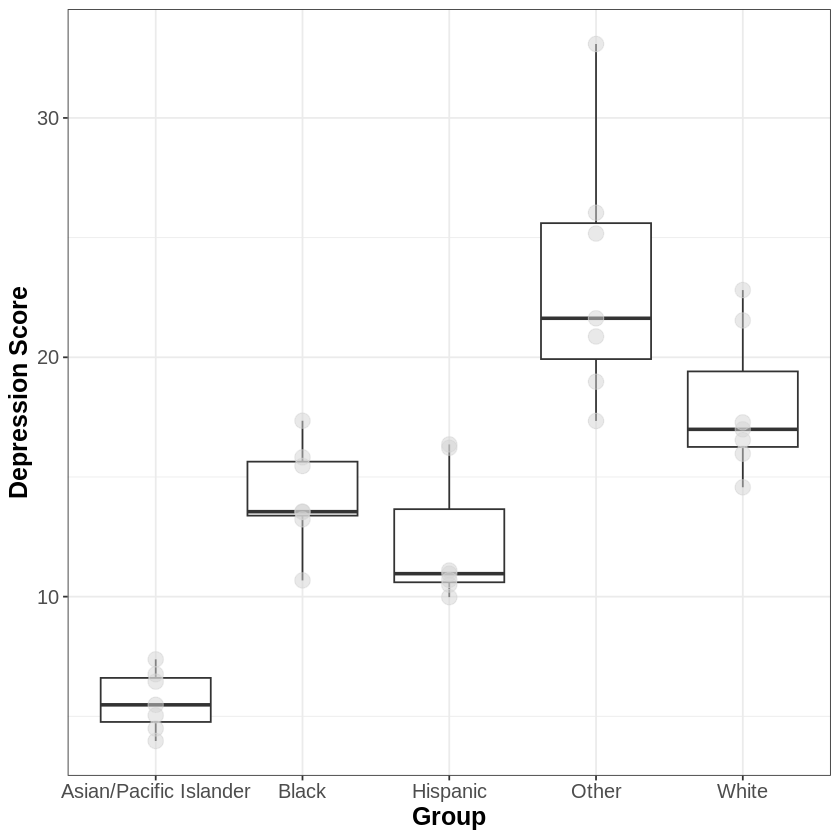

In [ ]:
final

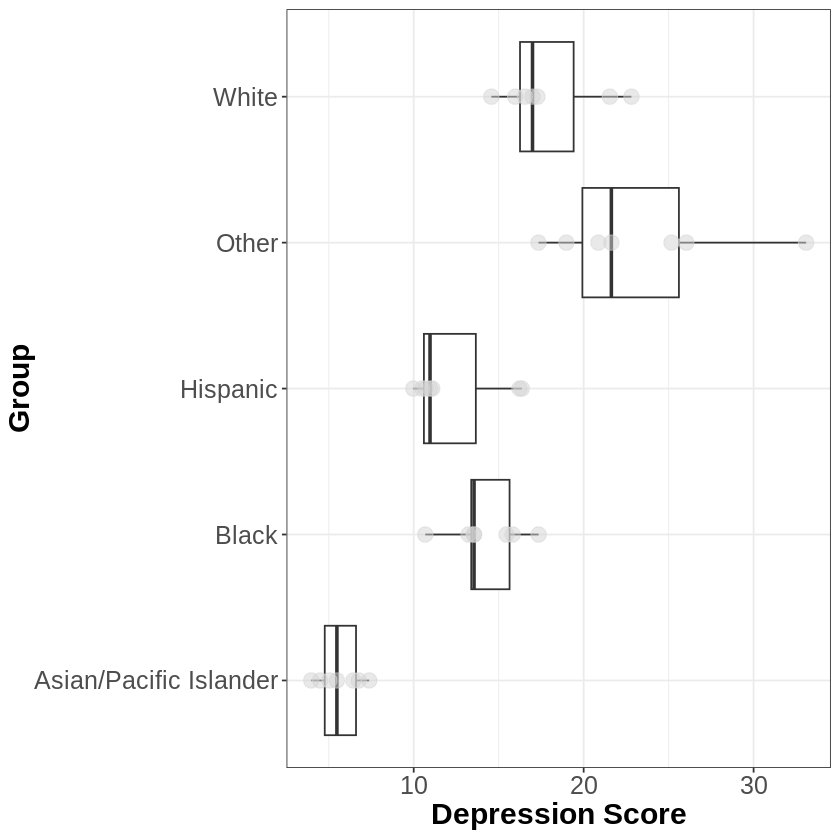

In [ ]:
race_plot + theme(axis.text = element_text(size = 15, angle=0)) +
  theme(axis.title = element_text(size = 18, face = "bold")) +
  coord_flip()
# A little easier to see

In [ ]:
model_sad <- lm(score ~ Group, data = race)

Warning message:
“Removed 35 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 35 rows containing missing values or values outside the scale range
(`geom_line()`).”


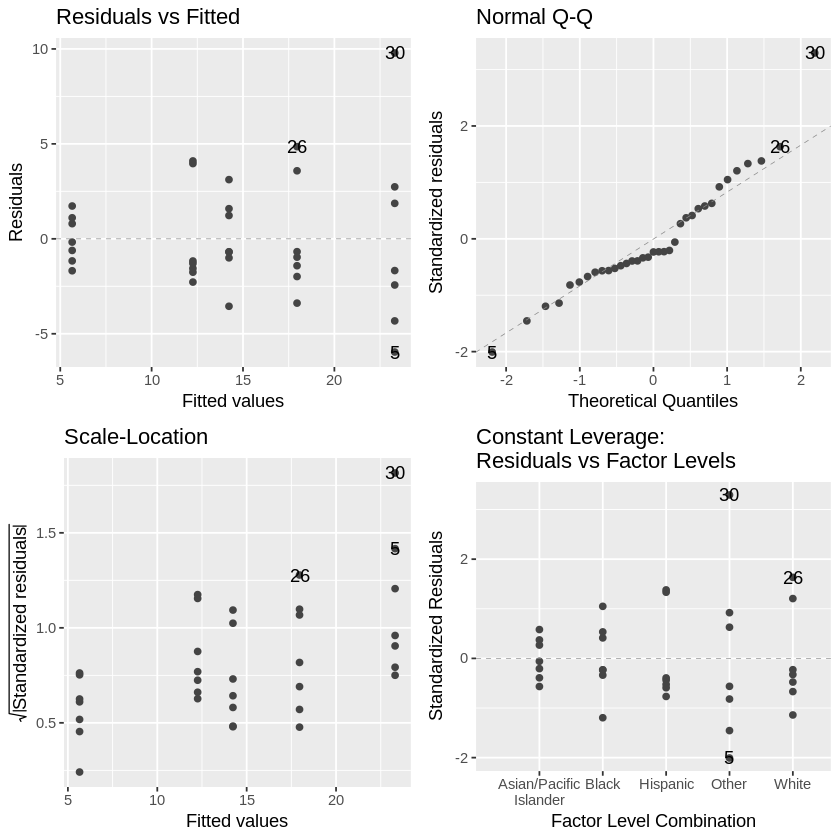

In [ ]:
autoplot(model_sad, smooth.colour = NA)

In [ ]:
anova(model_sad)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Group,4,1208.5212,302.13030,29.33613,5.545524e-10
Residuals,30,308.9675,10.29892,NA,NA


In [ ]:
summary(model_sad)


Call:
lm(formula = score ~ Group, data = race)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9629 -1.6779 -0.6929  1.6571  9.7871 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.653      1.213   4.660 6.07e-05 ***
GroupBlack       8.580      1.715   5.002 2.32e-05 ***
GroupHispanic    6.606      1.715   3.851 0.000574 ***
GroupOther      17.650      1.715  10.289 2.35e-11 ***
GroupWhite      12.304      1.715   7.173 5.56e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.209 on 30 degrees of freedom
Multiple R-squared:  0.7964,	Adjusted R-squared:  0.7692 
F-statistic: 29.34 on 4 and 30 DF,  p-value: 5.546e-10


In [ ]:
one.way <- aov(score ~ Group, data = race)
# this method from: https://www.scribbr.com/statistics/anova-in-r/

In [ ]:
summary(one.way)
# interesting that this is very similar but not quite identical to what the book is telling me

            Df Sum Sq Mean Sq F value   Pr(>F)    
Group        4   1208   302.1   29.34 5.55e-10 ***
Residuals   30    309    10.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
?relevel()